TASK 1:

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5402 - loss: 0.7826 - val_accuracy: 0.6809 - val_loss: 0.6002
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6628 - loss: 0.6154 - val_accuracy: 0.7234 - val_loss: 0.5459
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6731 - loss: 0.6078 - val_accuracy: 0.7340 - val_loss: 0.5274
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6430 - loss: 0.6385 - val_accuracy: 0.7340 - val_loss: 0.5170
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6858 - loss: 0.5894 - val_accuracy: 0.7234 - val_loss: 0.5099
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6710 - loss: 0.6069 - val_accuracy: 0.7234 - val_loss: 0.5053
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6857 - loss: 0.5839 - val_accuracy: 0.7234 - val_loss: 0.5008
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6946 - loss: 0.5785 - val_accuracy: 0.7340 - val_loss: 0.4947
Epo

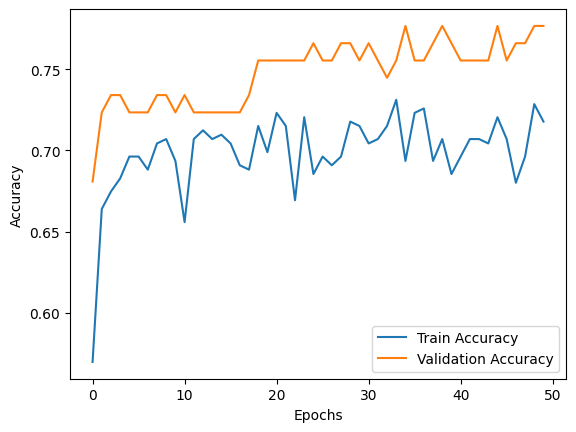

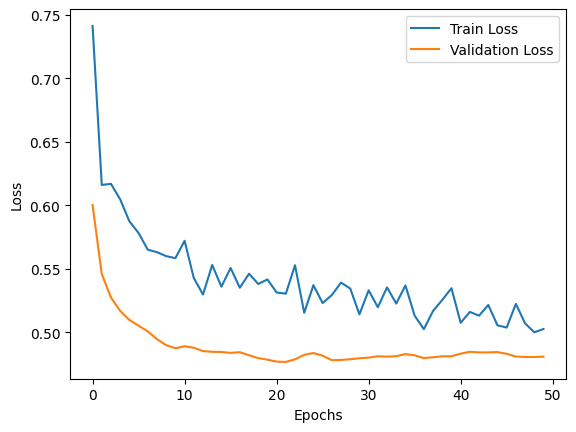

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout
from keras.api.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
data = pd.read_csv('indian_liver_patient.csv')

# Preprocessing
# Handle categorical variable 'Gender'
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Handle missing values in 'Albumin_and_Globulin_Ratio'
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

# Split data into features and target
X = data.drop('DiseaseStatus', axis=1)
y = data['DiseaseStatus']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target to categorical
y = to_categorical(y - 1)  # Subtract 1 to make labels start from 0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build fully connected feed-forward network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


TASK 2:    Згорткові нейронні мережі (CNN)

https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset?resource=download

In [5]:
import tensorflow as tf
from keras.api import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.api.applications import MobileNetV2
import matplotlib.pyplot as plt

# Параметри
image_size = (128, 128)
batch_size = 32
classes = ['Bishop', 'Knight', 'Pawn']  # Вибрані класи

data_dir = './task2/Chess/'  # Директорія з даними

# Завантаження даних
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=classes,
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=classes,
    subset='validation'
)

# 1. Мережа з нуля
model_scratch = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model_scratch.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

history_scratch = model_scratch.fit(train_data, 
                                    validation_data=val_data, 
                                    epochs=10)

# 2. Перенесення навчання
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model_transfer.compile(optimizer='adam', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

history_transfer = model_transfer.fit(train_data, 
                                      validation_data=val_data, 
                                      epochs=10)

# Порівняння результатів
plt.figure(figsize=(12, 5))

# Точність
plt.subplot(1, 2, 1)
plt.plot(history_scratch.history['accuracy'], label='From Scratch')
plt.plot(history_transfer.history['accuracy'], label='Transfer Learning')
plt.title('Точність')
plt.legend()

# Втрата
plt.subplot(1, 2, 2)
plt.plot(history_scratch.history['loss'], label='From Scratch')
plt.plot(history_transfer.history['loss'], label='Transfer Learning')
plt.title('Втрата')
plt.legend()

plt.show()

# Оцінка моделей
print("Model from Scratch:")
model_scratch.evaluate(val_data)

print("Model with Transfer Learning:")
model_transfer.evaluate(val_data)


Found 238 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.3756 - loss: 1.2968 - val_accuracy: 0.3559 - val_loss: 1.0945
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.4235 - loss: 1.0841 - val_accuracy: 0.3559 - val_loss: 1.0781
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.4165 - loss: 1.0458 - val_accuracy: 0.5763 - val_loss: 1.0337
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.5828 - loss: 0.9264 - val_accuracy: 0.5085 - val_loss: 0.9955
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.6463 - loss: 0.8456 - val_accuracy: 0.6102 - val_loss: 0.8739
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.7369 - loss: 0.6593 - val_accuracy: 0.7288 - val_loss: 0.9139
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.7176 - loss: 0.5708 - val_accuracy: 0.6780 - val_loss: 0.8328
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.7955 - loss: 0.4487 - val_accuracy: 0.7119 - val_loss:

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_128_no_top.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)

TASK 3:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training model from scratch...
Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.3651 - loss: 1.2782 - val_accuracy: 0.3536 - val_loss: 1.1033
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.3564 - loss: 1.1335 - val_accuracy: 0.3705 - val_loss: 1.0981
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.3487 - loss: 1.1099 - val_accuracy: 0.3705 - val_loss: 1.0986
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.3502 - loss: 1.0992 - val_accuracy: 0.3705 - val_loss: 1.1009
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.3524 - loss: 1.1009 - val_accuracy: 0.3705 - val_loss: 1.0989
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.3657 - loss: 1.0977 - val_accuracy: 0.3705 - val_loss: 1.0991
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.3551 - loss: 1.1023 - val_accuracy: 0.3705 - val_loss: 1.0996
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

TASK 4

Class distribution after balancing:
Sentiment
2    2186
4    1256
3     929
1       1
Name: count, dtype: int64
Training model from scratch...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4684 - loss: 1.4992 - val_accuracy: 0.5543 - val_loss: 1.1075
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5741 - loss: 1.0265 - val_accuracy: 0.7214 - val_loss: 0.8003
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7191 - loss: 0.7399 - val_accuracy: 0.7629 - val_loss: 0.6616
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.5241 - val_accuracy: 0.7800 - val_loss: 0.6211
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3963 - val_accuracy: 0.7886 - val_loss: 0.6151
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9100 - loss: 0.3047 - val_accuracy: 0.7957 - val_loss: 0.6406
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9327 - loss: 0.2431 - val_accuracy: 0.7943 - val_loss: 0.6427
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9310 - loss: 0.2319 - val_accuracy: 0.7914 - val_loss:

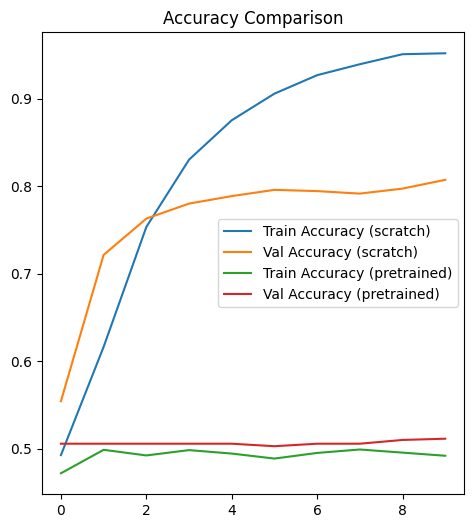

In [21]:
import pandas as pd
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('text.csv')  # Replace with your CSV file

# Text cleaning
def cleaning(value):
    punctuation_cleaning = []
    stopwords_cleaning_string = ''
    
    for i in value:
        if i not in string.punctuation:
            punctuation_cleaning.append(i)
    punctuation_cleaning = "".join(punctuation_cleaning).split()
    
    # Remove stopwords (using a custom list)
    stopwords_list = ["a", "an", "the", "in", "on", "at", "is", "it", "and", "to", "of"]
    for j in punctuation_cleaning:
        if j.lower() not in stopwords_list:
            stopwords_cleaning_string += j.lower() + ' '
    
    return stopwords_cleaning_string

data['Cleaned_Text'] = data['Text'].apply(cleaning)

# Encode labels
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

# Balance classes
majority_class = data[data['Sentiment'] == data['Sentiment'].value_counts().idxmax()]
minority_classes = data[data['Sentiment'] != data['Sentiment'].value_counts().idxmax()]

# Resample minority classes
minority_classes_resampled = resample(minority_classes, 
                                      replace=True, 
                                      n_samples=len(majority_class), 
                                      random_state=123)

data_balanced = pd.concat([majority_class, minority_classes_resampled])

# Check class distribution
print("Class distribution after balancing:")
print(data_balanced['Sentiment'].value_counts())

# Split data
X = data_balanced['Cleaned_Text']
y = data_balanced['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
maxlen = int(np.ceil(np.mean([len(x) for x in X_train_seq])))
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')
total_words = len(tokenizer.word_index) + 1

# ---- Model 1: Training from scratch ---- #
print("Training model from scratch...")
model_scratch = Sequential()
model_scratch.add(Embedding(total_words, 32, input_length=maxlen))
model_scratch.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model_scratch.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_scratch.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history_scratch = model_scratch.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# ---- Model 2: Using pretrained embeddings ---- #
print("Loading pretrained embeddings...")
embedding_dim = 50
embedding_matrix = np.zeros((total_words, embedding_dim))
# Instead of GloVe, initializing random vectors for simplicity
for word, i in tokenizer.word_index.items():
    if i < total_words:
        embedding_matrix[i] = np.random.rand(embedding_dim)

model_pretrained = Sequential()
model_pretrained.add(Embedding(
    total_words,
    embedding_dim,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False  # Freeze pretrained vectors
))
model_pretrained.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model_pretrained.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_pretrained.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history_pretrained = model_pretrained.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# ---- Evaluation ---- #
print("Evaluating model trained from scratch...")
results_scratch = model_scratch.evaluate(X_test_pad, y_test, verbose=0)
print(f"Loss: {results_scratch[0]}, Accuracy: {results_scratch[1]}")

print("Evaluating model with pretrained embeddings...")
results_pretrained = model_pretrained.evaluate(X_test_pad, y_test, verbose=0)
print(f"Loss: {results_pretrained[0]}, Accuracy: {results_pretrained[1]}")

# ---- Visualization ---- #
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_scratch.history['accuracy'], label='Train Accuracy (scratch)')
plt.plot(history_scratch.history['val_accuracy'], label='Val Accuracy (scratch)')
plt.plot(history_pretrained.history['accuracy'], label='Train Accuracy (pretrained)')
plt.plot(history_pretrained.history['val_accuracy'], label='Val Accuracy (pretrained)')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()
